In [2]:
import matplotlib
import matplotlib.pyplot as plt
pgf_with_rc_fonts = {"pgf.texsystem": "lualatex"}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.gridspec as gridspec
import numpy as np
import os as os 
import pandas as pd 
import lmfit
from lmfit.models import PseudoVoigtModel, LinearModel
from matplotlib.pyplot import subplots
import glob

In [3]:
mid_q_norm = {'01_pos1_th0.11_-0.': 467.8732175531387,
              '02_pos1_th0.11_-0.': 342.7176137518883,
              '03_pos1_th0.11_-0.': 373.7160419800282,
              '04_pos1_th0.11_-0.': 476.070297778368,
              '05_pos1_th0.11_-0.': 152.7934582636356,
              '06_pos1_th0.11_-0.': 134.37847326147556,
              '07_pos1_th0.11_0.0': 563.0148946204187,
              '08_pos1_th0.11_0.0': 442.03711247229575,
              '09_pos1_th0.11_0.0': 259.54231100749973,
              '10_pos1_th0.11_0.0': 338.1651567418576}

{'01_pos1_th0.11_-0.': 467.8732175531387, '02_pos1_th0.11_-0.': 342.7176137518883, '03_pos1_th0.11_-0.': 373.7160419800282, '04_pos1_th0.11_-0.': 476.070297778368, '05_pos1_th0.11_-0.': 152.7934582636356, '06_pos1_th0.11_-0.': 134.37847326147556, '07_pos1_th0.11_0.0': 563.0148946204187, '08_pos1_th0.11_0.0': 442.03711247229575, '09_pos1_th0.11_0.0': 259.54231100749973, '10_pos1_th0.11_0.0': 338.1651567418576}


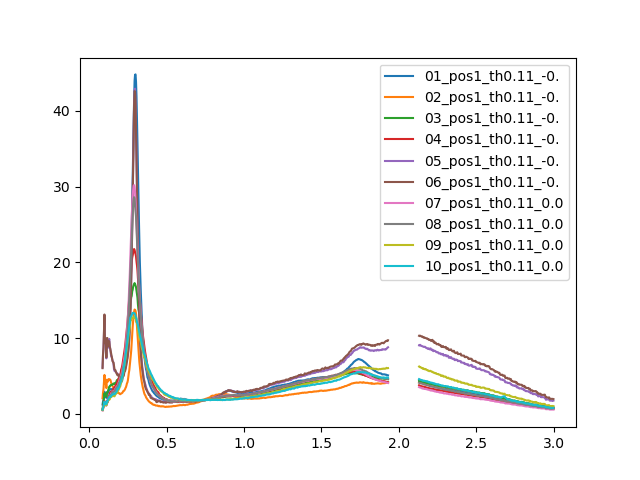

In [13]:
%matplotlib widget
chi_linecut_path = '/Volumes/One Touch/NSLS2_March2023/waxs_0p11/analysis/q_linecuts_1to10/'
os.chdir(chi_linecut_path)
fig, ax1 = subplots(1,1)
sam_names = []
norm_vals = []
dictionary = {}
for name in glob.glob('TC*th0.11*_5to85cut.txt'):
    name_idx_start = name.find('TC')
    name_idx_start = name_idx_start + 2
    name_idx_end = name.find('_5to85')
    name_short_idx_end = name.find('_th0.11')
    name_label = name[name_idx_start:name_idx_end]
    name_short = name[name_idx_start:name_short_idx_end]
    
    colnames = ['q', 'i']
    total = pd.read_csv(name, names=colnames, header=None,
                     delim_whitespace=True)
    
    index1 = total['q'].sub(0.739).abs().idxmin()
    index2 = total['q'].sub(0.809).abs().idxmin()
    # index1 = total['q'].sub(2.8).abs().idxmin()
    # index2 = total['q'].sub(3.0).abs().idxmin()
    i_norm = total.iloc[index1:index2, 1].min()
    i_norm = i_norm*0.554
    
    sam_names.append(name_label)
    norm_vals.append(i_norm)
    
    linecut_data = np.loadtxt(name)
    intensity = linecut_data[:,1]/i_norm
    q_vals = linecut_data[:,0]
    intensity[(1.93 <= q_vals) & (q_vals <= 2.13)] = np.nan
    ax1.plot(q_vals, intensity, label=name_label)
plt.legend()
dictionary = dict(zip(sam_names, norm_vals))
print(dictionary)

{'PM7_opt_A0p110_30s': 12059.12615787506, 'PM7D4_opt_A0p110_30s': 17046.565671539305, 'PM7D5_opt_A0p110_30s': 19398.728496719363, 's7_th0.1_-0.': 449.26278329277034}


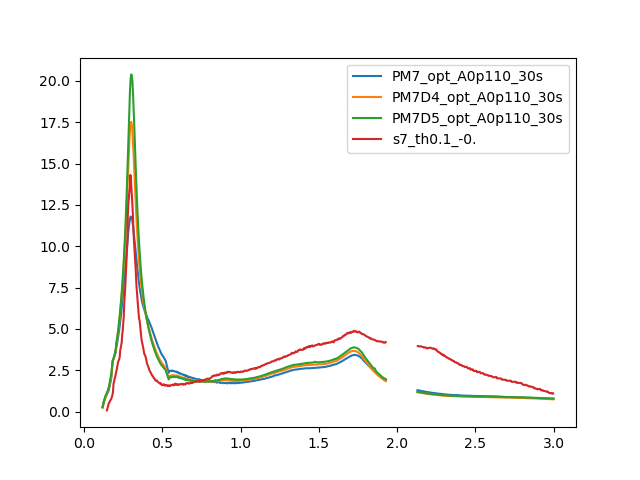

In [6]:
%matplotlib widget
chi_linecut_path = '/Volumes/One Touch/NSLS2_Feb2023/MToney/comparison/Opt'
os.chdir(chi_linecut_path)
fig, ax1 = subplots(1,1)
sam_names = []
norm_vals = []
for name in glob.glob('TC*_5to85cut.txt'):
    name_idx_start = name.find('TC')
    name_idx_start = name_idx_start + 3
    name_idx_end = name.find('_5to85')
    name_short_idx_end = name.find('_th0.11')
    name_label = name[name_idx_start:name_idx_end]
    name_short = name[name_idx_start:name_short_idx_end]
    
    colnames = ['q', 'i']
    total = pd.read_csv(name, names=colnames, header=None,
                     delim_whitespace=True)
    
    index1 = total['q'].sub(0.739).abs().idxmin()
    index2 = total['q'].sub(0.809).abs().idxmin()
    i_norm = total.iloc[index1:index2, 1].min()
    i_norm = i_norm*0.554
    
    sam_names.append(name_label)
    norm_vals.append(i_norm)
    
    linecut_data = np.loadtxt(name)
    intensity = linecut_data[:,1]/i_norm
    q_vals = linecut_data[:,0]
    intensity[(1.93 <= q_vals) & (q_vals <= 2.13)] = np.nan
    ax1.plot(q_vals, intensity, label=name_label)
plt.legend()
dictionary = dict(zip(sam_names, norm_vals))
print(dictionary)

{'s7_th0.1_-0.': 449.26278329277034, 's4_th0.1_-0.': 579.5847345733644}


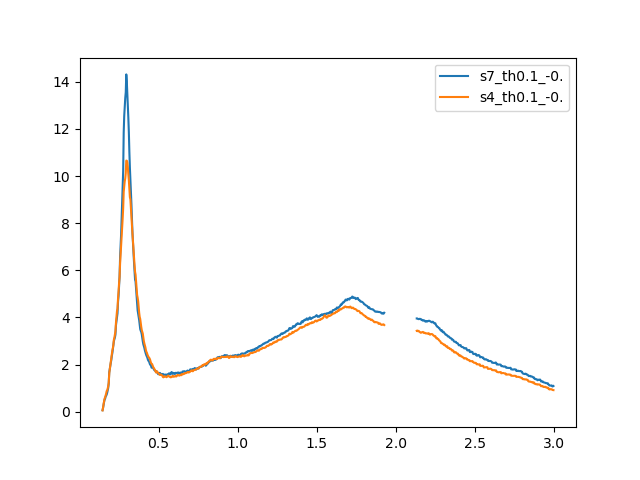

In [7]:
%matplotlib widget
chi_linecut_path = '/Volumes/One Touch/NSLS2_Feb2023/MToney/comparison/D3'
os.chdir(chi_linecut_path)
fig, ax1 = subplots(1,1)
sam_names = []
norm_vals = []
for name in glob.glob('TC*_5to85cut.txt'):
    name_idx_start = name.find('TC')
    name_idx_start = name_idx_start + 3
    name_idx_end = name.find('_5to85')
    name_short_idx_end = name.find('_th0.11')
    name_label = name[name_idx_start:name_idx_end]
    name_short = name[name_idx_start:name_short_idx_end]
    
    colnames = ['q', 'i']
    total = pd.read_csv(name, names=colnames, header=None,
                     delim_whitespace=True)
    
    index1 = total['q'].sub(0.739).abs().idxmin()
    index2 = total['q'].sub(0.809).abs().idxmin()
    i_norm = total.iloc[index1:index2, 1].min()
    i_norm = i_norm*0.554
    
    sam_names.append(name_label)
    norm_vals.append(i_norm)
    
    linecut_data = np.loadtxt(name)
    intensity = linecut_data[:,1]/i_norm
    q_vals = linecut_data[:,0]
    intensity[(1.93 <= q_vals) & (q_vals <= 2.13)] = np.nan
    ax1.plot(q_vals, intensity, label=name_label)
plt.legend()
dictionary = dict(zip(sam_names, norm_vals))
print(dictionary)